# Workshop "Datos: El recurso que tu empresa debe aprovechar"

## Aplicación: Análisis Exploratorio de Datos con Python

### Objetivo:
En este workshop vamos a realizar un breve análisis exploratorio de datos con Python, usando una de las librerías más utilizadas el manejo y análisis de datos: ¡Pandas! Además, crearemos algunas visualizaciones con otra librería llamada Matplotlib, que junto con Pandas, hacen un ¡súper combo!

En esta aplicación vamos a utilizar una base de datos que contiene información sobre la venta de aguacates. Nuestro objetivo es tomar este conjunto de información y transformarlo en información valiosa y oportunda para la toma de decisiones.

NOTA: Si no tienes conocimiento en Python, ¡no te preocupes! El objetivo es que adquieras una idea de cómo está herramienta te puede servir en tu vida profesional, así que ¡ánimo!

## Llamar librerías de utilidad
Lo primero que debemos hacer antes de comenzar a analizar los datos, es llamar todas las librerías que nos serán útiles durante el proceso:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Análisis Exploratorio con Python ... usando Pandas y Matplotlib

Ahora que tenemos nuestras librerías, estamos listos para comenzar a trabajar.

Lo primero será usar Pandas para cargar nuestra base de datos, la cual se encuentra en un repositorio de Github; mismo que te comparto para que puedas revisar este código en otra ocasión:

In [3]:
url = 'https://raw.githubusercontent.com/DillanAS/WorkshopBEDU_Datos/main/venta_aguacate_Bedu.csv'
df = pd.read_csv(url, index_col = 0)
print(df.head()) # Esta función nos permite dar un breve vistazo a los datos

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


Lo primero que tenemos que hacer al analizar datos, es obtener algunas medidas descriptivas básicas ... sí, justo las que viste en tus cursos de estadística desriptiva. Para ello, pandas nos ofrece una serie de métodos nos permitirán extraer información:

In [4]:
print(df[['avg_price', 'nb_sold']].describe())

         avg_price       nb_sold
count  1014.000000  1.014000e+03
mean      1.319024  4.167774e+06
std       0.295168  5.596185e+06
min       0.760000  8.343000e+02
25%       1.040000  1.320755e+05
50%       1.325000  4.232327e+05
75%       1.540000  1.019066e+07
max       2.090000  2.274362e+07


Como podemos observar, el precio promedio es de 1.31USD, sin embargo, sabemos que en nuestra base de datos tenemos dos tipos de aguacate: convencional y orgánico ... ¿Saber esto nos sirve de algo?

La respuesta es ¡sí! podemos calcular el predio promedio por tipo de aguacate e incluso por tamaño:

In [5]:
print(df.groupby('type')['avg_price'].mean())

type
conventional    1.092012
organic         1.546036
Name: avg_price, dtype: float64


In [6]:
print(df.groupby(['type', 'size'])['avg_price'].mean())

type          size       
conventional  extra_large    1.092012
              large          1.092012
              small          1.092012
organic       extra_large    1.546036
              large          1.546036
              small          1.546036
Name: avg_price, dtype: float64


Ahora podemos darnos cuenta de una serie de elementos importantes:
- 1) En promedio, el precio del aguacate orgánico es mayor que el aguacate convencional
- 2) El precio promedio del aguacate no varía respecto al tamaño del aguacate ... 1 kilo sigue siendo 1 kilo, ¿cierto?

Ahora vamos a realizar gráficas que nos permitan extrar más información de nuestros datos, fusionando el poder de cálculo en dataframes que ofrece Pandas, con el poder de visualización que ofrece Matplotlib.

Comencemos aprovechando nuestra función de groupby para graficar el promedio del precio con base en el tamaño del aguacate.

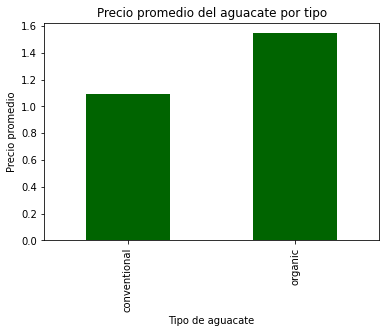

In [7]:
df.groupby('type')['avg_price'].mean().plot(kind = 'bar', color = 'darkgreen')
plt.title('Precio promedio del aguacate por tipo')
plt.xlabel('Tipo de aguacate')
plt.ylabel('Precio promedio')
plt.show()

Ahora un histograma del precio promedio para ver cómo distribuyen los datos.

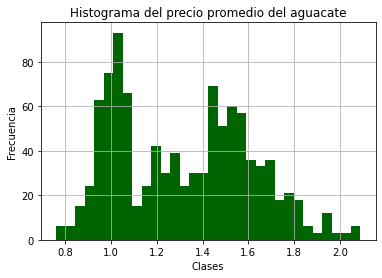

In [8]:
df['avg_price'].hist(bins='sqrt', color = 'darkgreen')
plt.title('Histograma del precio promedio del aguacate')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

¿Existirá alguna diferencia en la distribución del precio con base en el tipo de aguacate?

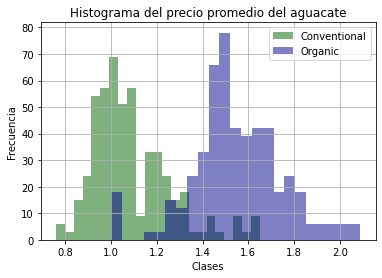

In [9]:
df[df['type'] == 'conventional']['avg_price'].hist(bins='sqrt', color = 'darkgreen',
                                                        label = 'Conventional', alpha = 0.5)
df[df['type'] == 'organic']['avg_price'].hist(bins='sqrt', color = 'darkblue',
                                                        label = 'Organic', alpha = 0.5)
plt.title('Histograma del precio promedio del aguacate')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Otra forma de analizar y comparar las distribuciones, es a través de boxplots

In [10]:
conv = df[df['type'] == 'conventional']['avg_price']
org = df[df['type'] == 'organic']['avg_price']

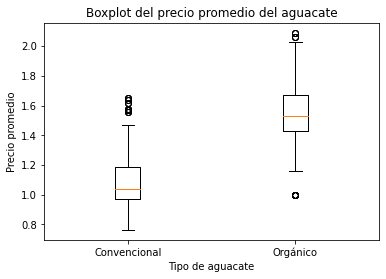

In [11]:
plt.boxplot([conv, org])
plt.title('Boxplot del precio promedio del aguacate')
plt.xlabel('Tipo de aguacate')
plt.ylabel('Precio promedio')
plt.xticks(ticks = [1, 2], labels = ['Convencional', 'Orgánico'])
plt.show()

Estudiemos las ventas a través del tiempo

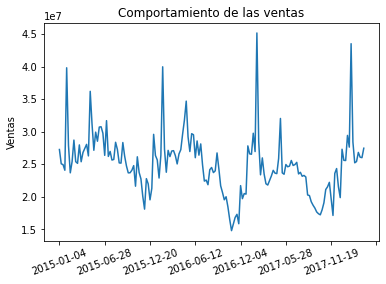

In [19]:
nb_sold_by_date = df.groupby('date')['nb_sold'].sum()
nb_sold_by_date.plot(kind = 'line')
plt.title('Comportamiento de las ventas')
plt.xlabel('')
plt.ylabel('Ventas')
plt.xticks(rotation = 20)
plt.show()

Con la información que tenemos también podemos estudiar el comportamiento del precio promedio a través del tiempo

In [20]:
conv = df[df['type'] == 'conventional'][['date', 'avg_price']]
org = df[df['type'] == 'organic'][['date', 'avg_price']]

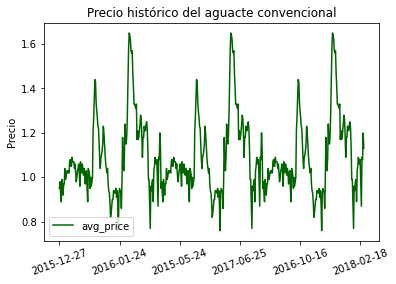

In [22]:
conv.plot(x = 'date', y = 'avg_price', color = 'darkgreen')
plt.title('Precio histórico del aguacte convencional')
plt.ylabel('Precio')
plt.xlabel('')
plt.xticks(rotation = 20)
plt.show()

¿Cuál es la relación que existe entre el precio y el volumen de ventas?

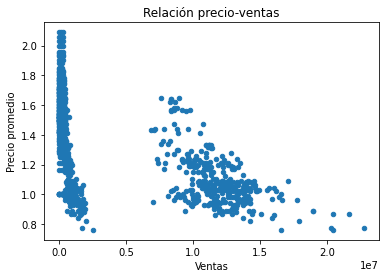

In [23]:
df.plot(x = 'nb_sold', y = 'avg_price', kind = 'scatter')
plt.title('Relación precio-ventas')
plt.xlabel('Ventas')
plt.ylabel('Precio promedio')
plt.show()